In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#读取数据，转换日期显示格式
unrate = pd.read_csv('UNRATE.csv')
unrate.info()
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate.info()
print (unrate.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 2 columns):
DATE     778 non-null object
VALUE    778 non-null float64
dtypes: float64(1), object(1)
memory usage: 12.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 2 columns):
DATE     778 non-null datetime64[ns]
VALUE    778 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.2 KB
        DATE  VALUE
0 1948-01-01    3.4
1 1948-02-01    3.8
2 1948-03-01    4.0
3 1948-04-01    3.9
4 1948-05-01    3.5


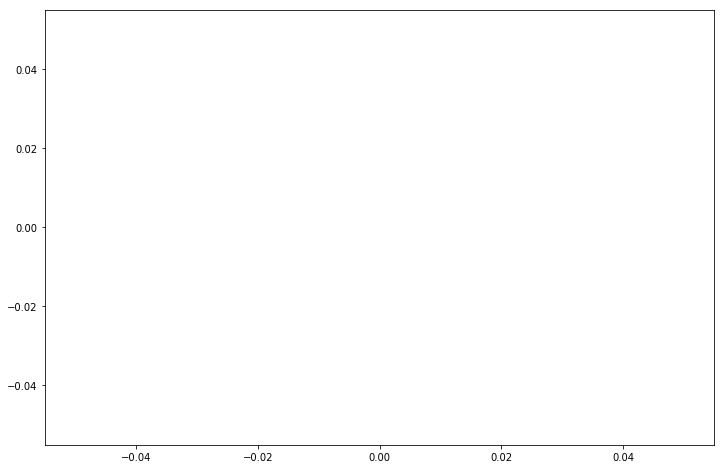

In [13]:
#画图的两个核心语句
plt.plot()
plt.show()

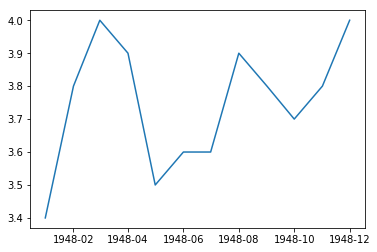

In [14]:
#取前12个数据画图，X轴为日期Y轴为失业率
ten_sample=unrate[:12]
plt.plot(ten_sample['DATE'], ten_sample['VALUE'])
plt.show()

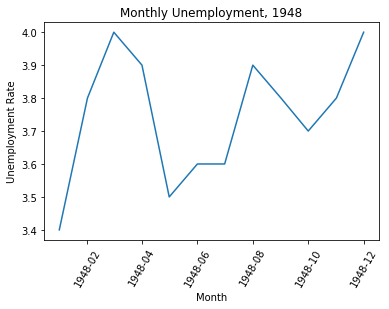

In [88]:
plt.plot(ten_sample['DATE'], ten_sample['VALUE'])
plt.xticks(rotation=60)#对X轴日期标注做60度旋转
#加XY轴指标名称和标题
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment, 1948')
plt.show()

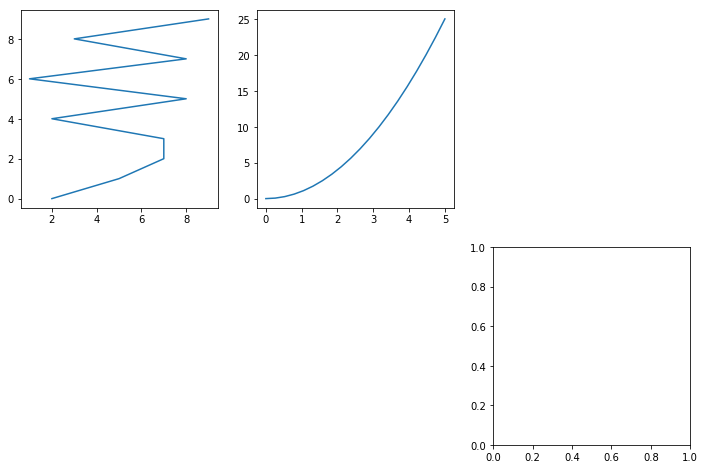

In [15]:
#plt.figure和fid.add_subplot语句添加子图
fig = plt.figure(figsize=(12,8))#figsize()定义子图的长宽
fg1 = fig.add_subplot(2,3,1)#()中三个数字分别是子图行，子图列，子图所处位置
fg2 = fig.add_subplot(2,3,2)
fg6 = fig.add_subplot(2,3,6)
#画子图
fg1.plot(np.random.randint(1,10,10),np.arange(10))
fg2.plot(np.linspace(0,5,20),np.linspace(0,5,20)**2)
plt.show()

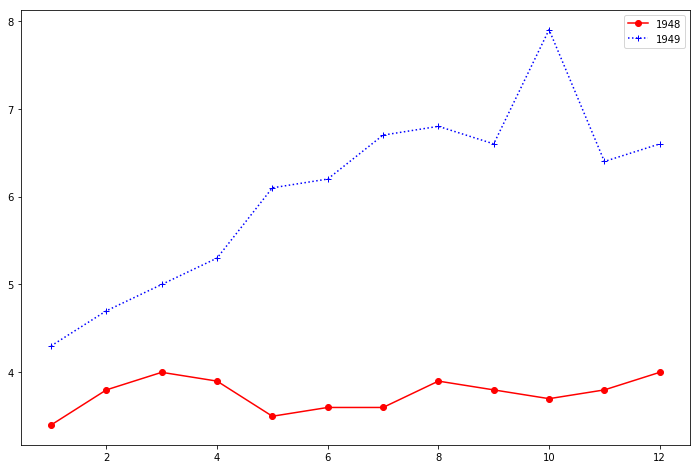

In [19]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8))
unrate['MONTH']=unrate['DATE'].dt.month#抽取日期中的月度属性
plt.plot(unrate['MONTH'][0:12], unrate['VALUE'][0:12], c='red',label='1948',marker='o')#c指颜色，label指画线的标签,
plt.plot(unrate['MONTH'][12:24], unrate['VALUE'][12:24], c='blue',label='1949',linestyle=':',marker='+')
plt.legend()#标签呈现位置，()表示plt.legend(loc='best')
plt.show()

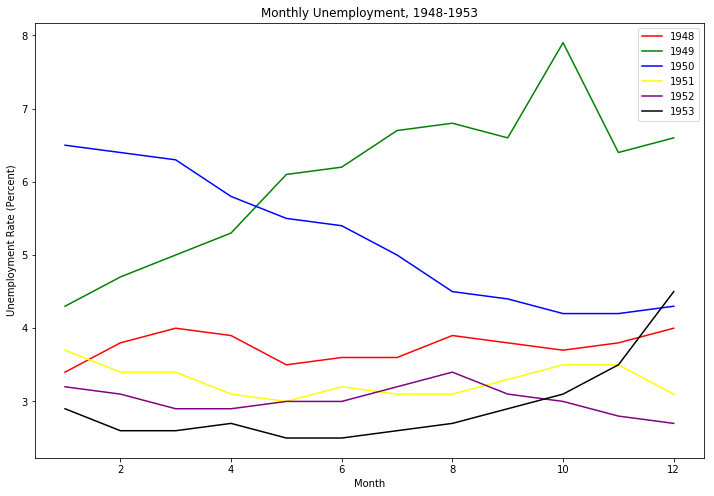

In [134]:
fig = plt.figure(figsize=(12,8))
unrate['MONTH'] = unrate['DATE'].dt.month
color = ('red','green','blue','yellow','purple','black')
#比较1948—1953六年的月度失业率
for a in range(6):
    start=a*12
    end=(a+1)*12#规定切片区间
    label=str(1948+a)
    plt.plot(unrate['MONTH'][start:end], unrate['VALUE'][start:end], c=color[a],label=label)
plt.legend(loc='best')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (Percent)')
plt.title('Monthly Unemployment, 1948-1953')
plt.show()

In [29]:
#读取电影评分数据，取要用的几项评分列
import pandas as pd
reviews = pd.read_csv('fandango_score_comparison.csv')
columns = ['FILM','RT_norm','Metacritic_norm','Metacritic_user_nom','IMDB_norm','Fandango_Stars']
norm_reviews=reviews[columns]
norm_reviews[:5]

,FILM,RT_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,Fandango_Stars
0,Avengers: Age of Ultron (2015),3.70,3.30,3.55,3.90,5.0
1,Cinderella (2015),4.25,3.35,3.75,3.55,5.0
2,Ant-Man (2015),4.00,3.20,4.05,3.90,5.0
3,Do You Believe? (2015),0.90,1.10,2.35,2.70,5.0
4,Hot Tub Time Machine 2 (2015),0.70,1.45,1.70,2.55,3.5


['RT_norm', 'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Stars']


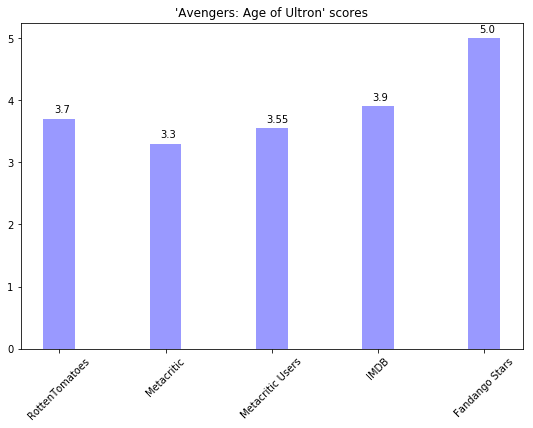

In [104]:
import matplotlib.pyplot as plt
import numpy as py
num_col =['RT_norm','Metacritic_norm','Metacritic_user_nom','IMDB_norm','Fandango_Stars']
#复联2各媒体评分的柱状图
bar_h=norm_reviews.loc[0,num_col].values#柱高
bar_l=np.arange(5) + 1#柱左侧起始坐标
fig=plt.figure(figsize=(9,6))
plt.bar(bar_l,bar_h,0.3,facecolor='#9999ff')
plt.xticks([1,2,3,4,5], ['RottenTomatoes','Metacritic','Metacritic Users','IMDB','Fandango Stars'],rotation=45)#X轴数字换成媒体名字
plt.title ('\'Avengers: Age of Ultron\' scores')
#给每个柱加上数据
for x,y in zip(bar_l,bar_h):
    plt.text(x-0.05,y+0.1,y)

plt.show()

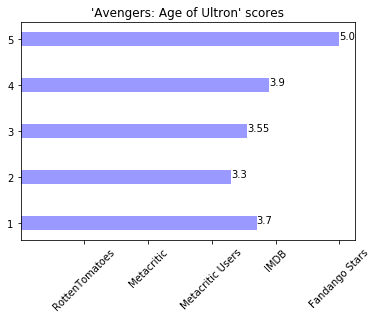

In [107]:
#plt.barh横向柱状图，其他都不变，注意标注数据时候XY互换
plt.barh(bar_l,bar_h,0.3,facecolor='#9999ff')
plt.xticks([1,2,3,4,5], ['RottenTomatoes','Metacritic','Metacritic Users','IMDB','Fandango Stars'],rotation=45)#X轴数字换成媒体名字
plt.title ('\'Avengers: Age of Ultron\' scores')
#给每个柱加上数据
for x,y in zip(bar_l,bar_h):
    plt.text(y,x,y)

plt.show()

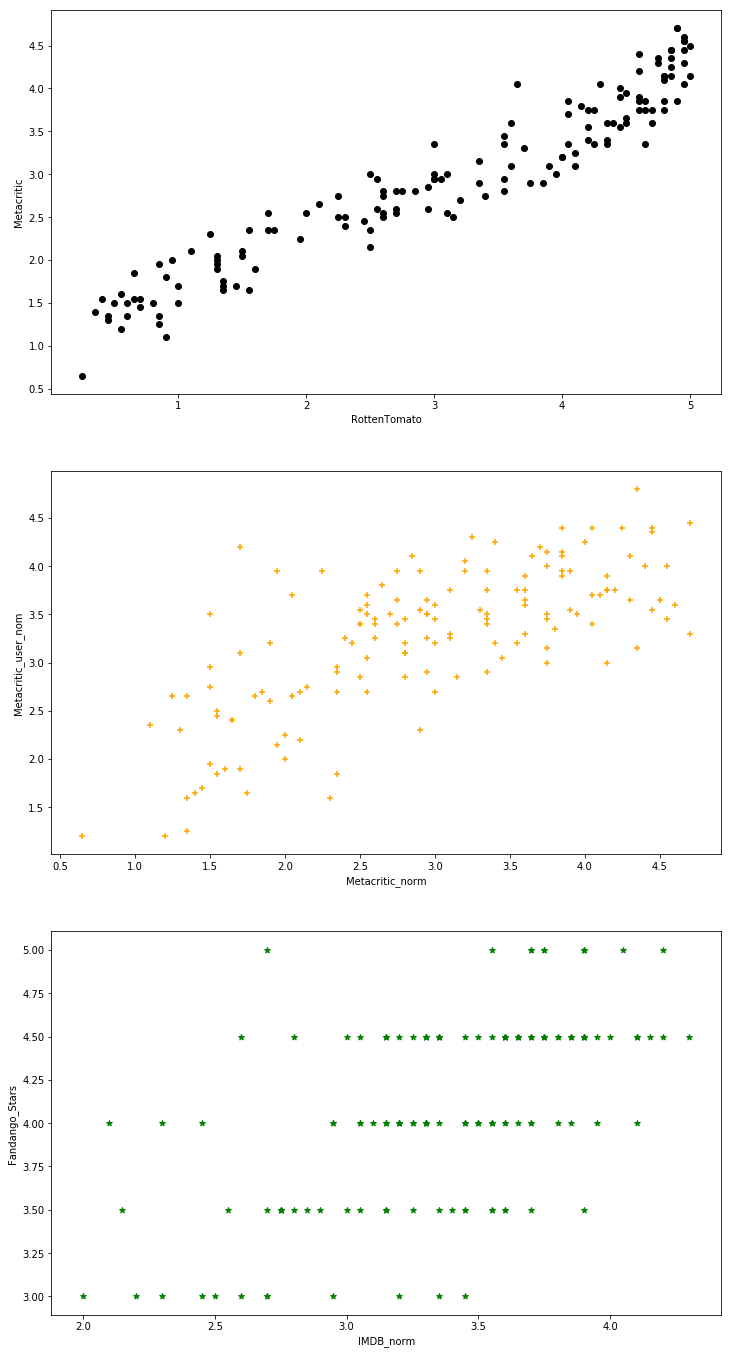

In [150]:
#散点图
fig = plt.figure(figsize=(12,24))
fig1=fig.add_subplot(3,1,1)
fig2=fig.add_subplot(3,1,2)
fig3=fig.add_subplot(3,1,3)

fig1.scatter(norm_reviews['RT_norm'], norm_reviews['Metacritic_norm'],marker='o',c='black')
fig1.set_xlabel('RottenTomato')
fig1.set_ylabel('Metacritic')

fig2.scatter(norm_reviews['Metacritic_norm'], norm_reviews['Metacritic_user_nom'],marker='+',c='orange')
fig2.set_xlabel('Metacritic_norm')
fig2.set_ylabel('Metacritic_user_nom')

fig3.scatter(norm_reviews['IMDB_norm'], norm_reviews['Fandango_Stars'],marker='*',c='green')
fig3.set_xlabel('IMDB_norm')
fig3.set_ylabel('Fandango_Stars')

plt.show()

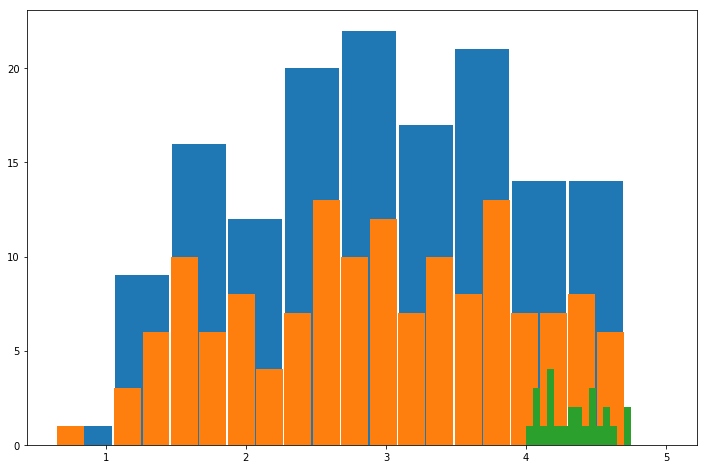

In [174]:
import pandas as pd
reviews = pd.read_csv('fandango_score_comparison.csv')
columns = ['FILM','RT_norm','Metacritic_norm','Metacritic_user_nom','IMDB_norm','Fandango_Stars']
norm_reviews=reviews[columns]
norm_reviews[:5]
#对meta评分进行频数统计，.hist语句作频数图
meta_distribution = norm_reviews['Metacritic_norm'].value_counts().sort_index()#value_counts()计数，sort_index()从低到高区间排列
fig, ax = plt.subplots(figsize=(12,8))#在plt.subplots()里调整图大小
ax.hist(norm_reviews['Metacritic_norm'],rwidth=0.95)#rwidh表示柱间距，默认无间距为1
ax.hist(norm_reviews['Metacritic_norm'],bins=20,rwidth=0.95)
ax.hist(norm_reviews['Metacritic_norm'],range=(4,5),bins=20,rwidth=0.95)

plt.show()


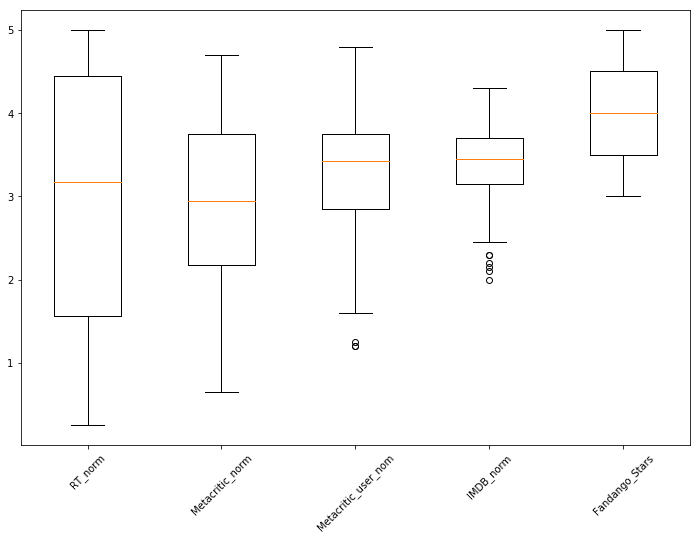

In [179]:
#.boxplot语句画盒图
num_col =['RT_norm','Metacritic_norm','Metacritic_user_nom','IMDB_norm','Fandango_Stars']
fig, ax=plt.subplots(figsize=(12,8))
ax.boxplot(norm_reviews[num_col].values)
ax.set_xticklabels(num_col, rotation=45)#X轴显示媒体名字并旋转45度
plt.show()